In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sympy as sym
from string import ascii_uppercase
from collections import Counter

In [ ]:
!wget https://raw.githubusercontent.com/marsgr6/r-scripts/master/notebooks/kundera.txt

--2023-07-07 21:07:00--  https://raw.githubusercontent.com/marsgr6/r-scripts/master/notebooks/kundera.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 273 [text/plain]
Saving to: ‘kundera.txt.2’

kundera.txt.2       100%[===================>]     273  --.-KB/s    in 0s      

2023-07-07 21:07:00 (14.8 MB/s) - ‘kundera.txt.2’ saved [273/273]



In [ ]:
!cat kundera.txt

Chance and chance alone has a message for us. Chance and chance alone has a message for us. Everything that occurs out of necessity, everything expected, repeated day in and day out, is mute. Only chance can speak to us. We read its message much as gypsies read the images made by coffee grounds at the bottom of a cup.

Chance and chance alone has a message for us. Everything that occurs out of necessity, everything expected, repeated day in and day out, is mute. Only chance can speak to us. We read its message much as gypsies read the images made by coffee grounds at the bottom of a cup.


In [ ]:
file = open("kundera.txt")
texto = file.read()
file.close()
texto


'Chance and chance alone has a message for us. Chance and chance alone has a message for us. Everything that occurs out of necessity, everything expected, repeated day in and day out, is mute. Only chance can speak to us. We read its message much as gypsies read the images made by coffee grounds at the bottom of a cup.'

### Markov text generator

1. Preprocess text
  - Split text
  - Remove punctuation
  - Convert text to lower case

2. Explore your data
  - Unique words and frequency

3. Define states and transition matrix (reading the text, learning)
  - Explore matrix
  - Explore state-transition diagram (text graph)

4. Test your generator

In [ ]:
# split text
words = texto.split()
words[:10]

['Chance',
 'and',
 'chance',
 'alone',
 'has',
 'a',
 'message',
 'for',
 'us.',
 'Chance']

In [ ]:
# remove punctuation

import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
table = str.maketrans('', '', string.punctuation)
words[8]

'us.'

In [ ]:
words[8].translate(table)

'us'

In [ ]:
# remove punctuation
stripped = [w.translate(table) for w in words]
stripped[:10]

words_min = [w.lower() for w in stripped]
words_min

['chance',
 'and',
 'chance',
 'alone',
 'has',
 'a',
 'message',
 'for',
 'us',
 'chance',
 'and',
 'chance',
 'alone',
 'has',
 'a',
 'message',
 'for',
 'us',
 'everything',
 'that',
 'occurs',
 'out',
 'of',
 'necessity',
 'everything',
 'expected',
 'repeated',
 'day',
 'in',
 'and',
 'day',
 'out',
 'is',
 'mute',
 'only',
 'chance',
 'can',
 'speak',
 'to',
 'us',
 'we',
 'read',
 'its',
 'message',
 'much',
 'as',
 'gypsies',
 'read',
 'the',
 'images',
 'made',
 'by',
 'coffee',
 'grounds',
 'at',
 'the',
 'bottom',
 'of',
 'a',
 'cup']

<BarContainer object of 39 artists>

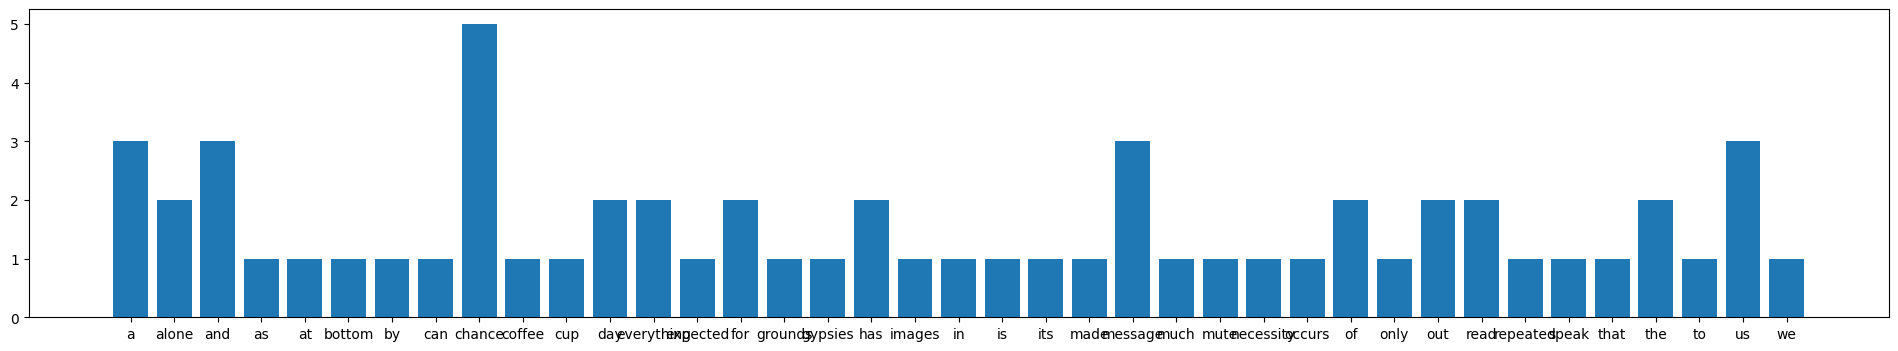

In [ ]:
# Markov states (words_names)

words_names, fw = np.unique(words_min, return_counts=True)
plt.figure(figsize=(24,4))
plt.bar(words_names, fw)

<AxesSubplot:>

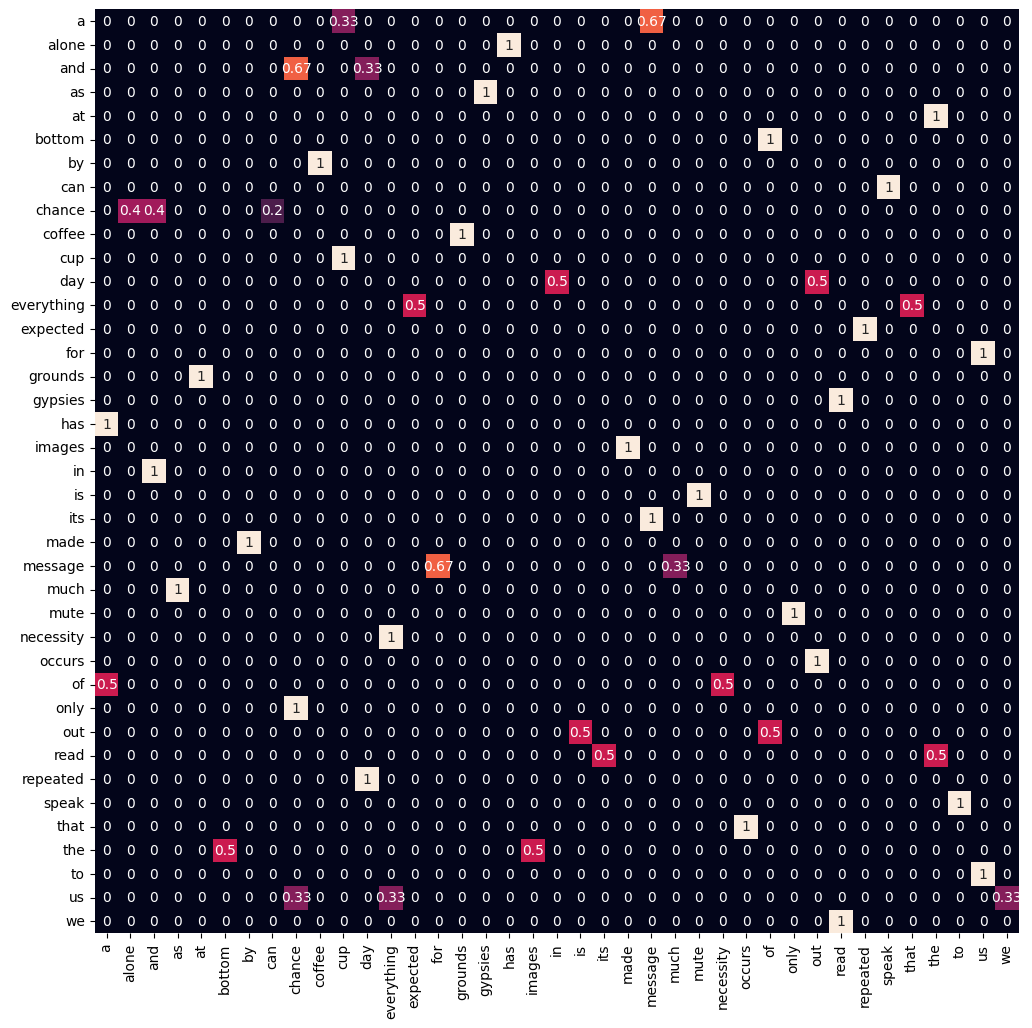

In [ ]:
# States: unique words
words_names = np.unique(words_min)

unique_words = len(words_names)

df = pd.DataFrame(np.zeros((unique_words, unique_words)),
    columns=words_names, index=words_names
    )

# Here we are reading
for i in range(1, len(words_min)):
    row = words_min[i-1]  # from
    col = words_min[i]  # to
    df[col][row] += 1

df['cup']['cup'] = 1

df.loc[:,:] = df.loc[:,:].div(df.sum(axis=1), axis=0)

plt.figure(figsize=(12,12))

sns.heatmap(df, cbar=False, square=True, annot=True)

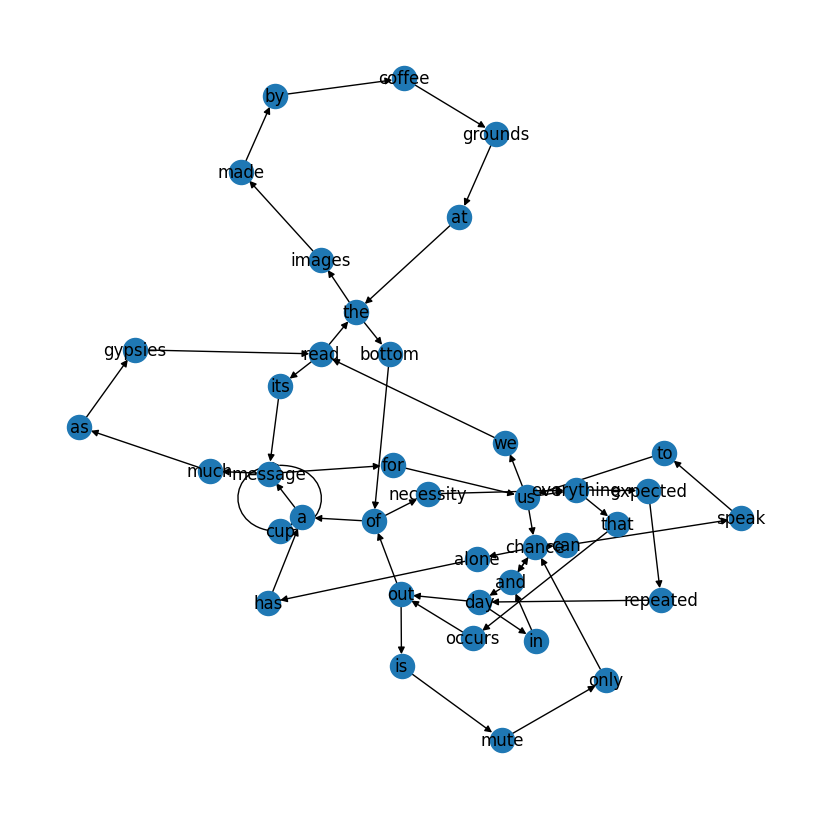

In [ ]:
import networkx as nx

G = nx.from_numpy_matrix(df.values, create_using=nx.DiGraph())
label_mapping = {idx: val for idx, val in enumerate(df.columns)}
G = nx.relabel_nodes(G, label_mapping)
plt.figure(figsize=(8,8))
nx.draw_kamada_kawai(G, with_labels=True)

In [ ]:
def rw_graph(start, steps, states, df):
    walk = [start]
    for si in range(steps):
        p = df.loc[walk[-1], :]
        walk += [np.random.choice(states, p=p)]
        if walk[-1] == walk[-2]: break
    return walk[:-1]

for i in range(10):
    w = ' '.join(rw_graph('chance', 8, words_names, df))
    print(w)

chance can speak to us everything that occurs
chance alone has a message for us everything
chance and chance and chance alone has a
chance and chance can speak to us chance
chance and day in and day in and
chance and chance can speak to us everything
chance and day in and chance and chance
chance can speak to us everything expected repeated
chance alone has a message much as gypsies
chance can speak to us everything expected repeated


### Resources

- https://github.com/Gr3gP/NLP-Projects/blob/main/Text_Generation_with_Markovify_Shakespeare.ipynb
- https://stats.stackexchange.com/questions/2457/markov-process-that-depends-on-present-state-and-past-state

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6270f206-ff88-4533-afc5-e2a8c2de37fb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>